## 2d iterative simulation with simple mesh motion/morphing

In [2]:
#Importing the required fem libraries
from dolfin import *
import matplotlib.pyplot as plt

mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, "Lagrange", 1)

In [3]:
# define boundary 
def boundary(x, on_boundary):
    return on_boundary


u0 = Constant(1.0)
# define Boundary conditions
bc = DirichletBC(V, u0, boundary)

In [4]:
# define the user expressions for f and g 
class f_exp(UserExpression):
    def eval(self, values, x):
        values[0] = 10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)
    def value_shape(self):
        return ()

class g_exp(UserExpression):
    def eval(self, values, x):
        values[0] = sin(5*x[0])
    def value_shape(self):
        return ()

In [5]:
# trial and test functions and the poisson equation
u = TrialFunction(V)
v = TestFunction(V)
f = f_exp(degree = 2)
g = g_exp(degree = 2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx

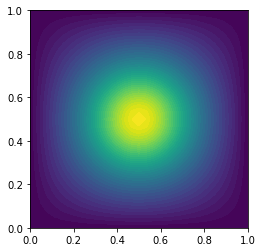

In [6]:
# Solve for first step
u = Function(V)
solve(a == L, u, bc)
plt.figure()
plot(u)

In [7]:
boundary = BoundaryMesh(mesh, "exterior")
# provide motion/displacement on the boundary
for x in boundary.coordinates():
    x[0] *= 2
    x[1] *= 2
    
mesh2=ALE.move(mesh, boundary) 

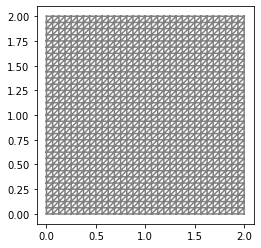

In [10]:
plot(mesh)

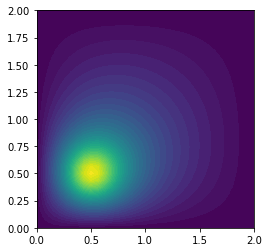

In [11]:
# solve for second time
u = Function(V)
solve(a == L, u, bc)
plt.figure()
plot(u)